In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import math as m
import vice
import sys
import os
sys.path.append("..")
from src.utils import mu, get_velocity_profile, boxcarsmoothtrend, oh_to_12pluslog
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=0, releaselevel='final', serial=0)


In [18]:
outputs = [
    # "../outputs/potential_well_deepening/gamma0p1",
    # "../outputs/potential_well_deepening/gamma0p2",
    "../outputs/potential_well_deepening/gamma0p3"
]
outputs = [vice.output(name) for name in outputs]

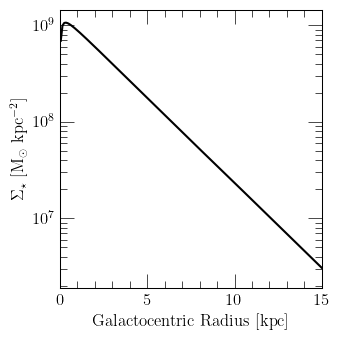

In [19]:
COLORS = ["black", "crimson", "dodgerblue"]

fig = plt.figure(figsize = (3.5, 3.5))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$\Sigma_\star$ [M$_\odot$ kpc$^{-2}$]")
ax.set_yscale("log")
ax.set_xlim([0, 15])

def plot_surface_density_profile(ax, output, lookback, zone_width = 0.1, **kwargs):
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    sigma_star = []
    for i in range(len(radii)):
        area = np.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
        mstar = output.zones["zone%d" % (i)].history["mstar"][idx]
        sigma_star.append(mstar / area)
    ax.plot(radii, sigma_star, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]]
    }
    plot_surface_density_profile(ax, outputs[i], 0, **kwargs)

plt.tight_layout()
plt.show()

In [20]:
outputs = [
    "../outputs/constant/vgas-0",
    "../outputs/potential_well_deepening/gamma0p1",
    "../outputs/potential_well_deepening/gamma0p2",
    "../outputs/potential_well_deepening/gamma0p3"
    # "../outputs/constant/vgas-0p5",
    # "../outputs/potential_well_deepening/gamma0p2",
    # "../outputs/amd/betaphiin0p7",
    # "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_42019/478767879.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  gradoh = [(outer - inner) / zone_width for outer, inner in zip(oh[1:], oh[:-1])]


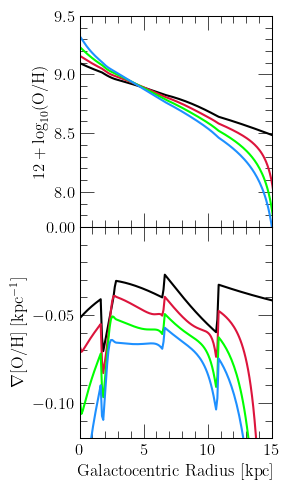

In [22]:
COLORS = ["black", "crimson", "lime", "dodgerblue"]
LINESTYLES = ["-", "-", "-", "-"]
LABELS = [
    r"$\gamma = 0$",
    r"$\gamma = 0.1$",
    r"$\gamma = 0.2$",
    r"$\gamma = 0.3$"
]

fig = plt.figure(figsize = (3, 5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax2.set_xlabel(r"Galactocentric Radius [kpc]")
ax2.set_ylabel(r"$\nabla$[O/H] [kpc$^{-1}$]")
ax1.set_ylabel(r"$12 + \log_{10}$(O/H)")
ax1.set_xlim([0, 15])
ax1.set_ylim([7.7, 9.5])
ax2.set_ylim([-0.12, 0])
ax2.set_yticks([-0.1, -0.05, 0])

def plot_metallicity_profile(ax_profile, ax_grad, output, lookback, zone_width = 0.1, **kwargs):
    n_zones = len(output.zones.keys())
    radii = [zone_width * (i + 0.5) for i in range(n_zones)]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    oh = [output.zones["zone%d" % (i)].history["[o/h]"][idx] for i in range(n_zones)]
    oh = oh_to_12pluslog(oh)
    gradoh = [(outer - inner) / zone_width for outer, inner in zip(oh[1:], oh[:-1])]
    ax_profile.plot(radii, oh, **kwargs)
    ax_grad.plot(radii[:-1], gradoh, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_metallicity_profile(ax1, ax2, outputs[i], 0, **kwargs)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.show()